# $\text{More Examples on Image Dataset Loading}$

# <font color='#0baef5 '> [1] </font>  <font color='#f52f0b'> Importing Libraries </font>

In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch # Pytorch
import torchvision # Pytorch computer vision library

device = "cuda:0" if torch.cuda.is_available() else 'cpu' # For selecting the device, CPU or GPU.

print("Cpu cores found:", os.cpu_count()) # Printing number of cpu cores we have.
print("Device:", device) # Printing the device.
print("torch:", torch.__version__) # Checking Pytorch version
print("torchvision:",torchvision.__version__) # Checking torchvision version

Cpu cores found: 2
Device: cpu
torch: 2.3.1+cu121
torchvision: 0.18.1+cu121


For list of cuda supported device: https://developer.nvidia.com/cuda-gpus

For checking gpu information: `!nvidia-smi`

For monitoring gpu processes: `watch -d -n 0.5 nvidia-smi`

# <font color='#0baef5 '> [2] </font>  <font color='#f52f0b'> Getting Data </font>

## <font color='#0baef5 '> [2.1] </font>  <font color='#f52f0b'> Loading **Cifar-10** data from **torchvision.datasets** </font>

## Cifar-10 Dataset


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

<!-- The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. -->

Site: https://www.cs.toronto.edu/~kriz/cifar.html

Here are the classes in the dataset, as well as 10 random images from each:


![cifar10 dataset](https://pytorch.org/tutorials/_images/cifar10.png)

### <font color='#0baef5 '> [2.1.1] </font>  <font color='#f52f0b'> What is torchvision.transforms? </font>

## torchvision.transforms
Transforms are common image transformations available in the [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module.

It have different kind of transformation as:


1.   Geometry
2.   Color
3.   Composition


So, while downloading the data we have used some transformations.
These are:
*   **transforms.ToTensor()** :: Converts the images from the PIL format to PyTorch tensors. This transformation is essential as PyTorch models work with tensors.
*   **transforms.v2.ToImage()** :: Convert a tensor, ndarray, or PIL Image to Image with shape [..., C, H, W] ; this does not scale values.
*   **transforms.v2.ToDtype()** :: Converts the input to a specific dtype, optionally scaling the values for images or videos.
*   **transforms.Normalize()** :: In above code, **the mean values (0.4914, 0.4822, 0.4465) and standard deviation values (0.2023, 0.1994, 0.2010) are specific to the CIFAR-10 dataset and have been precomputed based on the dataset statistics.** These values are used to normalize the color channels of the images. The normalization formula applied is: (pixel_value - mean) / std.
*   **transforms.Resize()** :: This transformation resizes the images to a new size of 64x64 pixels.
*   **transforms.compose()** :: It's used to chain together multiple image transformations into a single pipeline. The transformations are applied in the order they are listed.

For more vision dataset can check: https://pytorch.org/vision/main/datasets.html

In [2]:
from torchvision.transforms import v2 as transforms

# Mean, Standard Deviation of three channels for Normalizing the image tensors.
# These values are taken from standard values on internet.
STATS = {
    'mean': [0.4914, 0.4822, 0.4465],
    'std': [0.2404, 0.2370, 0.2557]
}

custom_transforms = torchvision.transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    transforms.Normalize(mean=STATS['mean'], std=STATS['std']),
    transforms.Resize((64,64))
])
print(custom_transforms)

Compose(
    ToImage()
    ToDtype(scale=True)
    Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2404, 0.237, 0.2557], inplace=False)
    Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
)


In [3]:
def calculate_stats(dataset):
    data = [image for image, _ in dataset]
    data = torch.stack(data, dim=0)

    mean = data.mean(dim=(0, 2, 3))  # (Batch, Height, Width)
    std = data.std(dim=(0, 2, 3))
    return {
        'mean': mean.tolist(),
        'std': std.tolist()
    }

# STATS = calculate_stats(cifar_trainset)
# STATS

### <font color='#0baef5 '> [2.1.2] </font>  <font color='#f52f0b'> What is torchvision.datasets? </font>

## torchvision.datasets
Torchvision provides many built-in datasets in the [torchvision.datasets](https://pytorch.org/vision/main/datasets.html) module, as well as utility classes for building your own datasets.

It contains datasets for dfferent type of tasks as:

1.   Image classification
2.   Image detection or segmentation
3.   Image captioning and etc.

<!-- Here, we are acquiring the data by employing:

*   datasets.CIFAR10: This part creates an instance of the CIFAR10 dataset class, representing the CIFAR-10 dataset for training.
*   root='./data': Specifies the directory where the dataset will be downloaded and stored.
*   train=True: Indicates that this is the training subset of the CIFAR-10 dataset.
*   download=True: Specifies that if the dataset is not already present in the specified directory, it should be downloaded from the internet. -->

In [4]:
import torchvision.datasets as datasets

print("-"*10, "Train Dataset", "-"*10)
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=custom_transforms)
print(cifar_trainset)

print("\n", "-"*10, "Test Dataset", "-"*10)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=custom_transforms)
print(cifar_testset)

---------- Train Dataset ----------


100%|██████████| 170498071/170498071 [00:02<00:00, 59784861.10it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToImage()
               ToDtype(scale=True)
               Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2404, 0.237, 0.2557], inplace=False)
               Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
           )

 ---------- Test Dataset ----------
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToImage()
               ToDtype(scale=True)
               Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2404, 0.237, 0.2557], inplace=False)
               Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
           )


In [5]:
print("Number of images in training set:", len(cifar_trainset))
print("Number of images in testing set:", len(cifar_testset))

Number of images in training set: 50000
Number of images in testing set: 10000


Print information about the first few samples in the dataset

In [6]:
for i in range(5):
    image,  label = cifar_trainset[i]
    print(f"Sample {i + 1} - Label: {label}")
    print("Image Tensor Shape:", image.shape)
    print("Image Tensor Values (First 3x3 patch):\n", image[:, :3, :3])
    print("-" * 30)

Sample 1 - Label: 6
Image Tensor Shape: torch.Size([3, 64, 64])
Image Tensor Values (First 3x3 patch):
 tensor([[[-1.0816, -1.1469, -1.2774],
         [-1.2570, -1.3223, -1.4528],
         [-1.6077, -1.6730, -1.8035]],

        [[-1.0087, -1.0749, -1.2073],
         [-1.1824, -1.2528, -1.3934],
         [-1.5299, -1.6085, -1.7657]],

        [[-0.7800, -0.8490, -0.9870],
         [-0.9448, -1.0158, -1.1576],
         [-1.2746, -1.3494, -1.4989]]])
------------------------------
Sample 2 - Label: 9
Image Tensor Shape: torch.Size([3, 64, 64])
Image Tensor Values (First 3x3 patch):
 tensor([[[0.4681, 0.3539, 0.1255],
         [0.4110, 0.3304, 0.1693],
         [0.2968, 0.2835, 0.2570]],

        [[0.8942, 0.7287, 0.3978],
         [0.8238, 0.6925, 0.4298],
         [0.6832, 0.6201, 0.4939]],

        [[1.1218, 0.9262, 0.5351],
         [1.0527, 0.8917, 0.5696],
         [0.9147, 0.8227, 0.6387]]])
------------------------------
Sample 3 - Label: 9
Image Tensor Shape: torch.Size([3, 64, 64

In [7]:
classes = cifar_trainset.classes

print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

Number of Classes: 10
Class Names :
 ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


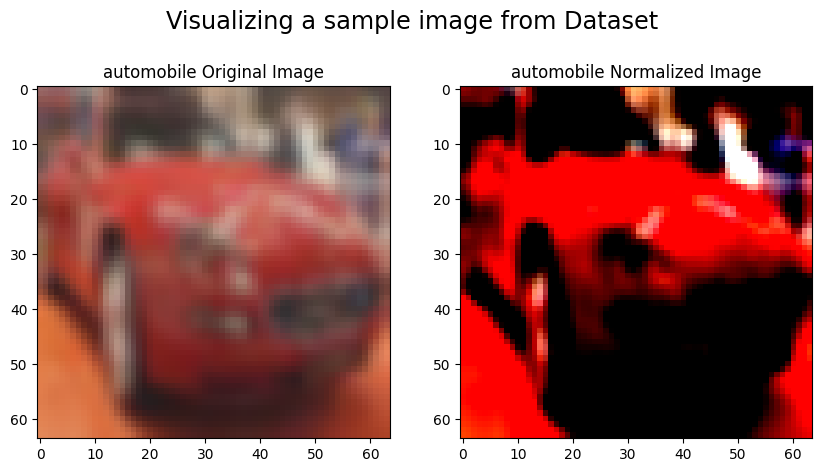

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
image, label = cifar_trainset[5]
image[0] = image[0] * 0.2023 + 0.4914
image[1] = image[1] * 0.1994 + 0.4822
image[2] = image[2] * 0.2010 + 0.4465
plt.imshow(image.permute((1,2,0)))
plt.title(f"{classes[label]} Original Image")

plt.subplot(1,2,2)
image, label = cifar_trainset[5]
plt.imshow(image.permute((1,2,0)))
plt.title(f"{classes[label]} Normalized Image")

plt.suptitle('Visualizing a sample image from Dataset', fontsize='xx-large', y=1)
plt.show()

In [9]:
STATS

{'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2404, 0.237, 0.2557]}

In [10]:
def denorm(img_tensors):
    """ Denormalizes image tensors using predefined STATS """
    img_tensors = img_tensors * STATS['std'][0] + STATS['mean'][0]
    return img_tensors.clamp(0,1)

Visualizing Unnormalized and Normalized Images from Train Datset

In [11]:
image, label = cifar_trainset[5]

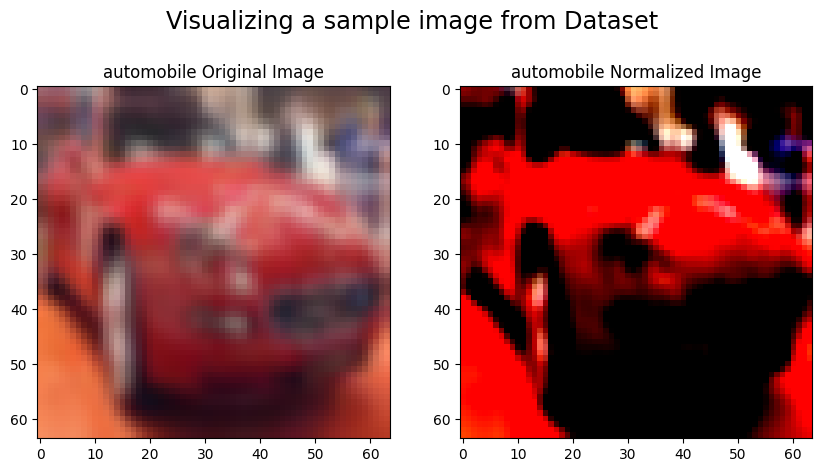

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(denorm(image).permute((1,2,0)))
plt.title(f"{classes[label]} Original Image")

plt.subplot(1,2,2)
plt.imshow(image.permute((1,2,0)).clamp(0,1))
plt.title(f"{classes[label]} Normalized Image")

plt.suptitle('Visualizing a sample image from Dataset', fontsize='xx-large', y=1)
plt.show()

### <font color='#0baef5 '> [2.1.4] </font>  <font color='#f52f0b'> Creating Dataloader </font>

## torch.utils.data.DataLoader
A [Torch DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) is a utility in the PyTorch library designed to facilitate the handling of datasets during training and inference processes. It achieves this by creating an iterable dataset object that can be efficiently processed in batches. This allows for improved memory usage and faster computation. The DataLoader can be employed with various data sources, such as NumPy arrays, PyTorch tensors, or custom data formats like CSV files or image directories. This class simplifies the process of loading, batching, and managing data for machine learning tasks, enhancing the overall efficiency and convenience of working with datasets in PyTorch.

In [13]:
train_dataloader = torch.utils.data.DataLoader(dataset=cifar_trainset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=cifar_testset, batch_size=64, shuffle=False)

It's good practice to check whether the dataloaders are working properly or not.

In [14]:
for data in tqdm(train_dataloader, desc='Sanity checking train_dataloader'):
    pass

for data in tqdm(test_dataloader, desc='Sanity checking test_dataloader'):
    pass

Sanity checking train_dataloader:   0%|          | 0/782 [00:00<?, ?it/s]

Sanity checking test_dataloader:   0%|          | 0/157 [00:00<?, ?it/s]

In [15]:
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

Number of batches in Train Dataloader: 782
Number of batches in Test Dataloader: 157


In [16]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64]))

In [17]:
print(labels)

tensor([9, 1, 0, 4, 0, 9, 2, 1, 8, 3, 0, 5, 4, 5, 9, 9, 2, 2, 7, 0, 7, 0, 8, 9,
        3, 1, 9, 4, 9, 4, 2, 0, 2, 8, 4, 6, 3, 6, 1, 1, 4, 1, 0, 0, 6, 9, 5, 5,
        2, 7, 4, 1, 9, 6, 4, 4, 2, 6, 9, 4, 0, 2, 5, 3])


For moving a bathc to device (CPU/GPU),

```python
device = "cuda:0" if torch.cuda.is_available() else 'cpu'
```

- `.to(device)`
- `.to('cpu)`
- `.to('cuda)`
- `.to('cuda:0)`
- `.to('cuda:1)`

For more can check: https://pytorch.org/docs/stable/tensor_attributes.html#torch-device

In [18]:
images, labels  = images.to(device), labels.to(device)

Visualizing Unnormalized and Normalized Images from Train Dataloader

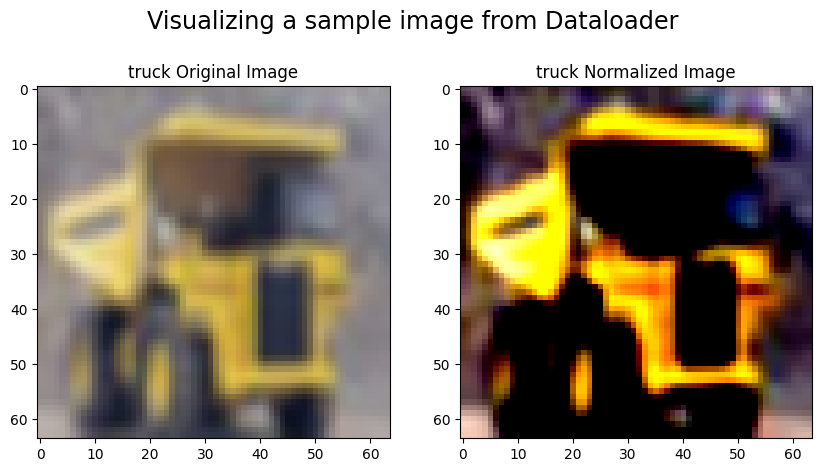

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(denorm(images[0]).permute((1,2,0)))
plt.title(f"{classes[labels[0]]} Original Image")

plt.subplot(1,2,2)
plt.imshow(images[0].permute((1,2,0)).clamp(0,1))
plt.title(f"{classes[labels[0]]} Normalized Image")

plt.suptitle('Visualizing a sample image from Dataloader', fontsize='xx-large', y=1)
plt.show()

Visualizing the first batch from Train Dataloader

In [20]:
from torchvision.utils import make_grid

plt.figure(figsize=(19,10))

plt.subplot(1,2,1)
plt.title("Normalized Image")
plt.imshow(make_grid(images, nrow=8).permute(1,2,0).clamp(0,1).detach().cpu().numpy(), cmap='gray') # .detach(): stops the gradient computation,
plt.axis(False)                                                                          # .cpu(): moves the tensor to the CPU,
                                                                                         # .numpy(): converts the tensor to a NumPy array for plotting.
plt.subplot(1,2,2)
plt.title("Original Image")
plt.imshow(make_grid(denorm(images), nrow=8).permute(1,2,0).detach().cpu().numpy(), cmap='gray')
plt.axis(False)

plt.suptitle('Visualizing a batch from Dataloader', fontsize='xx-large', y=1)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Visualizing 10 images from each class

In [21]:
for class_idx, class_label in enumerate(classes):
    print("-"*10, class_idx, class_label, "-"*120)

    class_images = []
    for j, (img, label) in enumerate(cifar_trainset):
        if label == class_idx:
            class_images.append(img)
        if len(class_images) == 10:
            break
    class_images = torch.tensor(np.array(class_images))

    plt.figure(figsize=(19,5))
    plt.imshow(make_grid(class_images, nrow=10).permute(1,2,0).clamp(0,1).detach().cpu().numpy())
    plt.title(f'Normalized {class_label} Images')
    plt.axis(False)
    plt.show()

    plt.figure(figsize=(19,5))
    plt.imshow(make_grid(denorm(class_images), nrow=10).permute(1,2,0).detach().cpu().numpy())
    plt.title(f'Original {class_label} Images')
    plt.axis(False)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# <font color='#0baef5 '> [3] </font>  <font color='#f52f0b'> Loading **Caltech101** data from **torchvision.datasets** </font>

## <font color='#0baef5 '> [3.1] </font>  <font color='#f52f0b'> Caltech101 Dataset</font>

### Let's do some pre-processing steps one by one

Now we will load another dataset which is [Caltech101](https://data.caltech.edu/records/mzrjq-6wc02).
The Caltech101 dataset contains images from 101 object categories (e.g., “helicopter”, “elephant” and “chair” etc.).
 <!-- and a background category that contains the images not from the 101 object categories.  -->
 For each object category, there are about 40 to 800 images, while most classes have about 50 images. The resolution of the image is roughly about 300×200 pixels.


In [22]:
# mean, standard deviation for Normalizing the image tensors
STATS = {
    'mean': (0.485,0.456,0.406),
    'std': (0.229,0.224,0.225)
}

custom_transforms = torchvision.transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    transforms.Normalize(mean=STATS['mean'], std=STATS['std']),
    transforms.Resize((256, 256))
])

Caltech101_data = datasets.Caltech101(root= './data', download=True, transform=custom_transforms)
print(Caltech101_data)

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=be654f6b-5fbd-497d-830c-4b5dd3f2c2b4
To: /content/data/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:04<00:00, 26.7MB/s]


Extracting ./data/caltech101/101_ObjectCategories.tar.gz to ./data/caltech101


Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=6bc41d57-6057-410a-a95b-ba2820a5573f
To: /content/data/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 53.3MB/s]


Extracting ./data/caltech101/Annotations.tar to ./data/caltech101
Dataset Caltech101
    Number of datapoints: 8677
    Root location: ./data/caltech101
    Target type: ['category']
    StandardTransform
Transform: Compose(
               ToImage()
               ToDtype(scale=True)
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
               Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=True)
           )


In [23]:
classes = Caltech101_data.categories

print("Total no. of classes:", len(classes))
print("First 5 classes:", classes[:5])

Total no. of classes: 101
First 5 classes: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion']


## <font color='#0baef5 '> [3.2] </font>  <font color='#f52f0b'> Splitting data \& Creating DataLoaders</font>

### <font color='#0baef5 '> Method [1]: </font>  <font color='#f52f0b'> Using PyTorch Library</font>

For more on PyTorch Dataloader arguments cn check https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

Length of Train dataset: 6942
Length of Test dataset: 1735
Number of batches in Train Dataloader: 108
Number of batches in Test Dataloader: 27


Sanity checking train_dataloader:   0%|          | 0/108 [00:00<?, ?it/s]

Sanity checking test_dataloader:   0%|          | 0/27 [00:00<?, ?it/s]

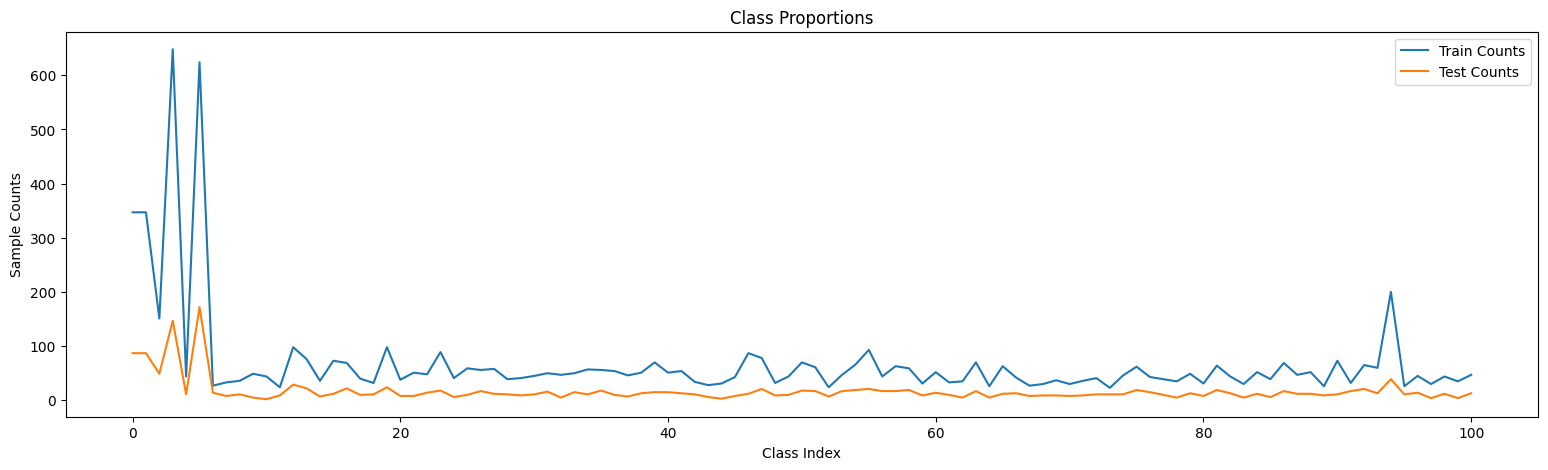

In [24]:
# Randomly spplitting the dataset into train and test dataset
train_dataset, test_dataset = torch.utils.data.random_split(Caltech101_data, [0.8, 0.2], torch.manual_seed(42))
print("Length of Train dataset:", len(train_dataset))
print("Length of Test dataset:", len(test_dataset))

# Creating train and test dataloader
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=64,
                                               shuffle=True,
                                               num_workers=os.cpu_count(), # num_workers: Utilizes all CPU cores for data loading.
                                               pin_memory=True, # pin_memory: Speeds up data transfer to the GPU by pre-pinning memory.
                                               drop_last=True, # drop_last: Drops the last incomplete batch if it's smaller than batch_size.
                                               persistent_workers=True # persistent_workers: Keeps worker processes alive between epochs for efficiency.
                                               )

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=64,
                                              shuffle=False,
                                              num_workers=os.cpu_count(),
                                              pin_memory=True,
                                              drop_last=True,
                                              persistent_workers=True
                                              )
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

# Checking class proportions in train and test dataloader
from collections import Counter
train_labels = []
test_labels = []

for _, labels in tqdm(train_dataloader, desc='Sanity checking train_dataloader'):
    train_labels.extend(labels.tolist())
train_counts = Counter(train_labels)
train_counts = dict(sorted(train_counts.items()))

for _, labels in tqdm(test_dataloader, desc='Sanity checking test_dataloader'):
    test_labels.extend(labels.tolist())
test_counts = Counter(test_labels)
test_counts = dict(sorted(test_counts.items()))

plt.figure(figsize=(19,5))
plt.plot(train_counts.keys(), train_counts.values(), label='Train Counts')
plt.plot(test_counts.keys(), test_counts.values(), label='Test Counts')
plt.legend(); plt.title("Class Proportions"); plt.xlabel('Class Index'); plt.ylabel('Sample Counts'); plt.show()

### <font color='#0baef5 '> Method [2]: </font>  <font color='#f52f0b'> Using Scikit-Learn Library</font>

Length of Train dataset: 6941
Length of Test dataset: 1736
Number of batches in Train Dataloader: 108
Number of batches in Test Dataloader: 27


Sanity checking train_dataloader:   0%|          | 0/108 [00:00<?, ?it/s]

Sanity checking test_dataloader:   0%|          | 0/27 [00:00<?, ?it/s]

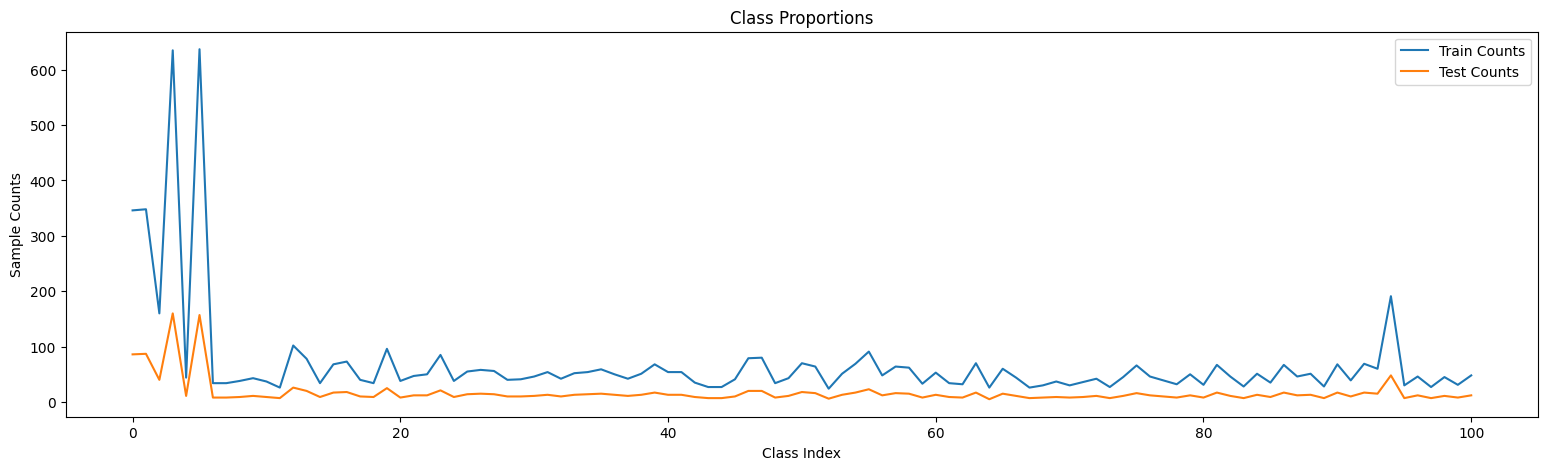

In [25]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# Getting train and test splits indices
train_indices, test_indices = train_test_split(range(len(Caltech101_data)),
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=True,
                                               stratify=Caltech101_data.y)

# Making subset of dataset using above indices
train_dataset = Subset(Caltech101_data, train_indices)
test_dataset = Subset(Caltech101_data, test_indices)
print("Length of Train dataset:", len(train_dataset))
print("Length of Test dataset:", len(test_dataset))

# Creating dataloader from above train and test subset dataset
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=os.cpu_count(), pin_memory=True, drop_last=True, persistent_workers=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=os.cpu_count(), pin_memory=True, drop_last=True, persistent_workers=True)
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

# Checking class proportions in train and test dataloader
from collections import Counter
train_labels = []
test_labels = []

for _, labels in tqdm(train_dataloader, desc='Sanity checking train_dataloader'):
    train_labels.extend(labels.tolist())
train_counts = Counter(train_labels)
train_counts = dict(sorted(train_counts.items()))

for _, labels in tqdm(test_dataloader, desc='Sanity checking test_dataloader'):
    test_labels.extend(labels.tolist())
test_counts = Counter(test_labels)
test_counts = dict(sorted(test_counts.items()))

plt.figure(figsize=(19,5))
plt.plot(train_counts.keys(), train_counts.values(), label='Train Counts')
plt.plot(test_counts.keys(), test_counts.values(), label='Test Counts')
plt.legend(); plt.title("Class Proportions"); plt.xlabel('Class Index'); plt.ylabel('Sample Counts'); plt.show()

This need not hold for each batch of dataloader.

In [26]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([64, 3, 256, 256]), torch.Size([64]))

In [27]:
print(labels)

tensor([ 39,   3, 100,   1,  30,  90,  58,  62,  76,  43,  11,   3,  75,  20,
         12,   2,  55,   0,  98,   1,   1,   3,  85,  37,  75,   0,   5,  33,
         55,  88,  25,  34,  16,   5,   7,   5,   0,  63,   5,   7,   0,  92,
         15,  80,  65,  31,  57,   3,  49,  35,  67,  55,   3,   8,   3,  47,
         20,  59,   5,  80,  74,   1,  18,  19])


The values used in transforms.Normalize() for the Caltech-101 dataset are often obtained through statistical analysis of the dataset.

# $\text{Transforming & Augmenting Images}$

Image augmentation enhances training data diversity by applying transformations like flips, rotations, and scaling, improving model generalization without increasing dataset size.

## <font color='#0baef5 '> [3.3] </font>  <font color='#f52f0b'> Visualizing Data Transforms </font>

### <font color='#0baef5 '> [1] </font>  <font color='#f52f0b'> Resize </font>

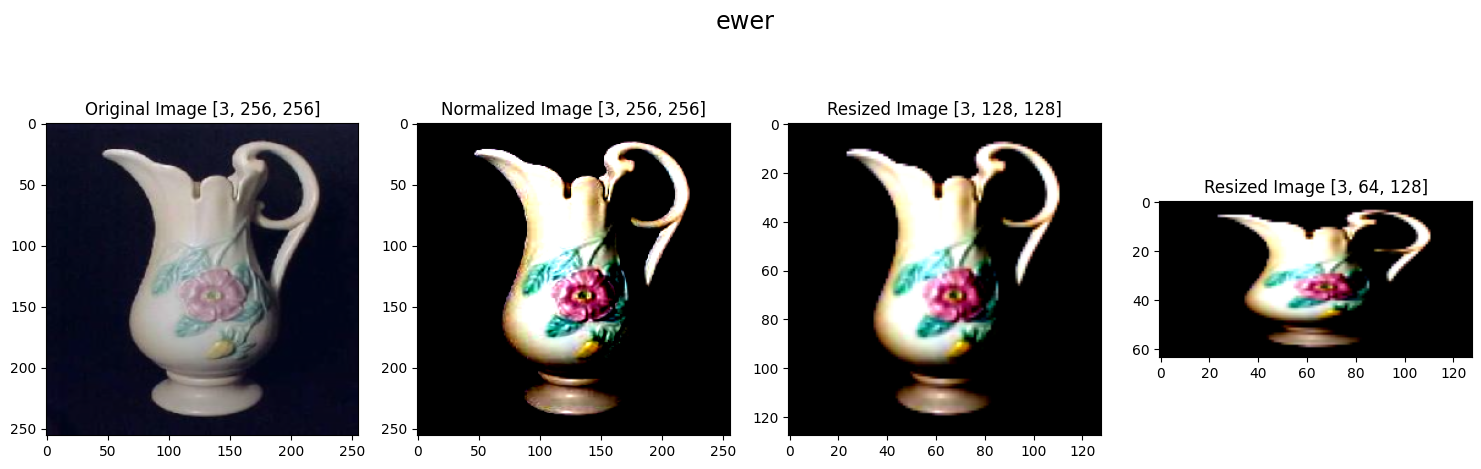

In [28]:
plt.figure(figsize=(15, 5))
image, label = images[0], classes[labels[0]]

plt.subplot(1,4,1)
img = denorm(image)
plt.imshow(img.permute((1,2,0)))
plt.title(f"Original Image {list(img.shape)}")

plt.subplot(1,4,2)
img = image
plt.title(f"Normalized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,3)
img = torchvision.transforms.v2.Resize(size=128)(image) # Height x Width
plt.title(f"Resized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,4)
img = torchvision.transforms.v2.Resize(size=(64, 128))(image)
plt.title(f"Resized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.suptitle(label, fontsize='xx-large', y=1)
plt.tight_layout()
plt.show()

### <font color='#0baef5 '> [2] </font>  <font color='#f52f0b'> ElasticTransform </font>

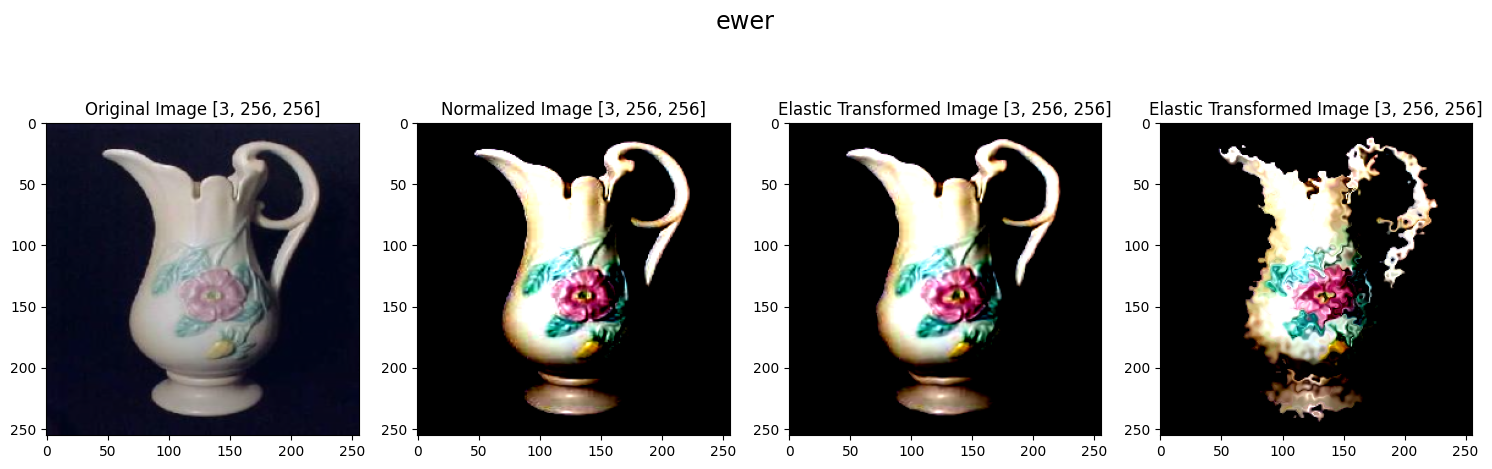

In [29]:
plt.figure(figsize=(15, 5))
image, label = images[0], classes[labels[0]]

plt.subplot(1,4,1)
img = denorm(image)
plt.imshow(img.permute((1,2,0)))
plt.title(f"Original Image {list(img.shape)}")

plt.subplot(1,4,2)
img = image
plt.title(f"Normalized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,3)
img = torchvision.transforms.v2.ElasticTransform()(image)
plt.title(f"Elastic Transformed Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,4)
img = torchvision.transforms.v2.ElasticTransform(alpha=70.0, # alpha: Magnitude of displacements. Default is 50.0.
                                                 sigma=2     # sigma: Smoothness of displacements. Default is 5.0.
                                                 )(image)
plt.title(f"Elastic Transformed Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.suptitle(label, fontsize='xx-large', y=1)
plt.tight_layout()
plt.show()

### <font color='#0baef5 '> [3] </font>  <font color='#f52f0b'> Invert the colors of an RGB/grayscale image </font>

Randomly inverts the pixel values of an image. The inversion is applied with a specified probability, meaning it flips the color intensities (e.g., black becomes white and vice versa).


- After Inversion the pixel values will become (255-r, 255-g, 255-b) from (r, g, b).
- The pixels are selected randomly with probability (p) and invesion is done

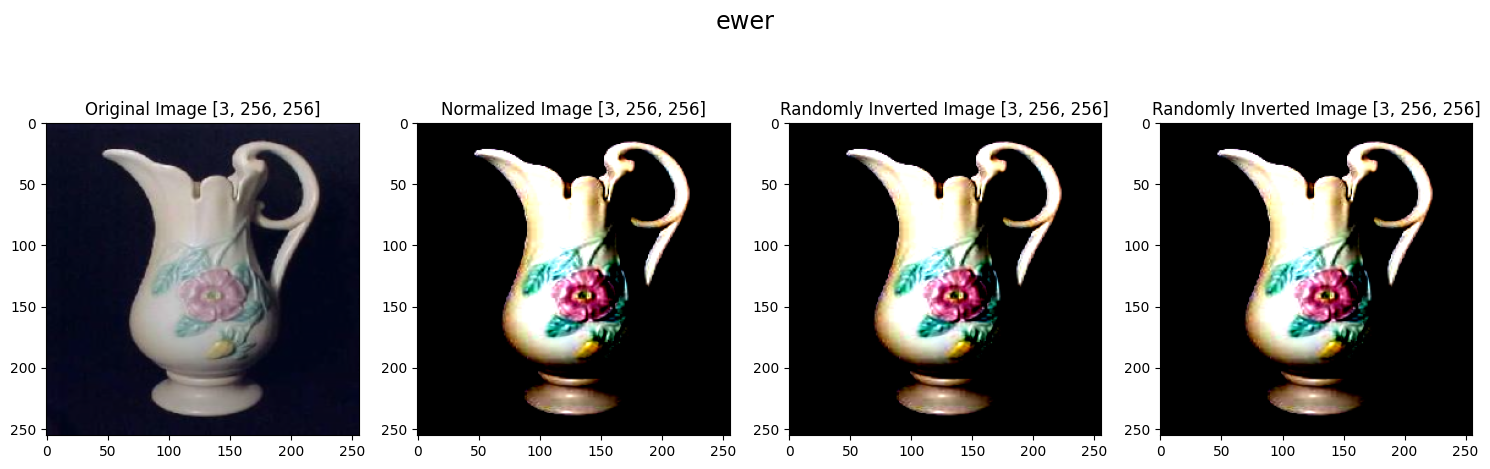

In [30]:
plt.figure(figsize=(15, 5))
image, label = images[0], classes[labels[0]]

plt.subplot(1,4,1)
img = denorm(image)
plt.imshow(img.permute((1,2,0)))
plt.title(f"Original Image {list(img.shape)}")

plt.subplot(1,4,2)
img = image
plt.title(f"Normalized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,3)
img = torchvision.transforms.v2.RandomInvert(p=0.001)(image)
plt.title(f"Randomly Inverted Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,4)
img = torchvision.transforms.v2.RandomInvert(p=0.8)(image)
plt.title(f"Randomly Inverted Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.suptitle(label, fontsize='xx-large', y=1)
plt.tight_layout()
plt.show()

### <font color='#0baef5 '> [4] </font>  <font color='#f52f0b'> Random Augmentation </font>

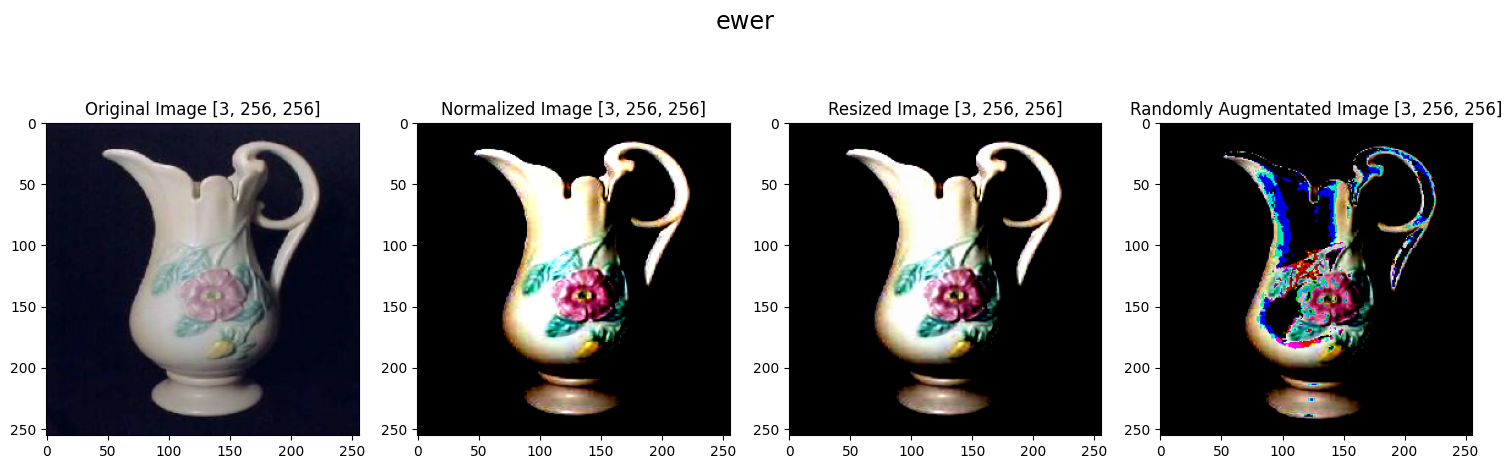

In [31]:
plt.figure(figsize=(15, 5))
image, label = images[0], classes[labels[0]]

plt.subplot(1,4,1)
img = denorm(image)
plt.imshow(img.permute((1,2,0)))
plt.title(f"Original Image {list(img.shape)}")

plt.subplot(1,4,2)
img = image
plt.title(f"Normalized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,3)
img = torchvision.transforms.v2.RandAugment(num_ops=4)(image)
plt.title(f"Resized Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.subplot(1,4,4)
img = torchvision.transforms.v2.RandAugment(num_ops=10, magnitude=1)(image)
plt.title(f"Randomly Augmentated Image {list(img.shape)}")
plt.imshow(img.permute((1,2,0)).clamp(0,1))

plt.suptitle(label, fontsize='xx-large', y=1)
plt.tight_layout()
plt.show()

- For checking torchvision transforms documentation can check [Transforming and augmenting images](https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images)
- For transforms methods can check [V2 API reference](https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended)
- For more transforms visualization can check [Illustration of transforms](https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#illustration-of-transforms)

#### /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# $\text{Loading Custom Dataset}$

# <font color='#0baef5 '> [4] </font>  <font color='#f52f0b'> Downloading Dataset from Kaggle </font>

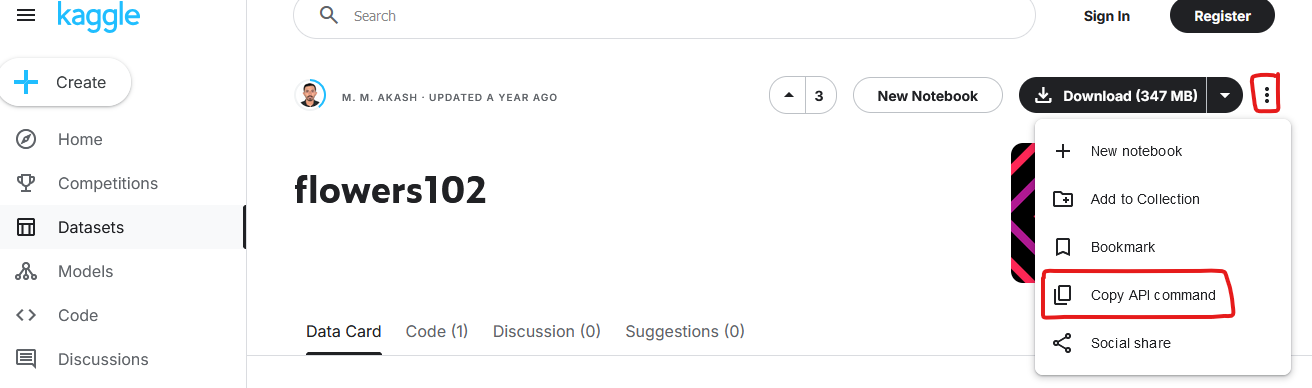

In [32]:
!kaggle datasets download -d akashrayhan/flowers102 --unzip -p data/flowers102
!ls data/flowers102

Dataset URL: https://www.kaggle.com/datasets/akashrayhan/flowers102
License(s): unknown
 97% 321M/331M [00:06<00:00, 33.4MB/s]
100% 331M/331M [00:06<00:00, 56.8MB/s]
cat_to_name.json  flowers


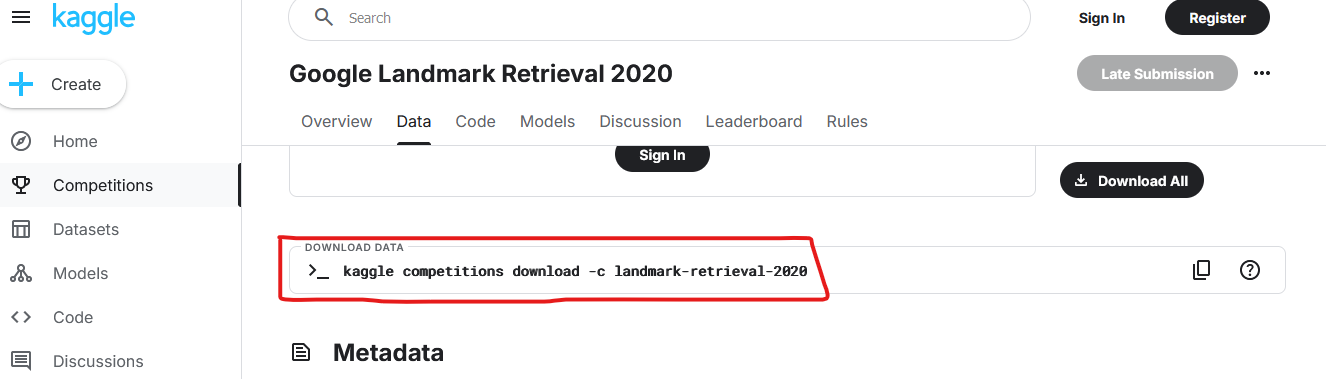

# <font color='#0baef5 '> [5] </font>  <font color='#f52f0b'> Loading Custom Dataset Using ImageFolder </font>

# Dataset:

**Oxford 102 Flower (102 Category Flower Dataset)**

This set contains images of flowers belonging to 102 different categories.
The images were acquired by searching the web and taking pictures. Each class consists of between 40 and 258 images.

In [33]:
from torchvision import datasets
from torchvision.datasets import ImageFolder

image_size = 64
STATS = {
    'mean': (0.5, 0.5, 0.5),
    'std': (0.5, 0.5, 0.5)
}

print("\n", "-"*10, "Train Dataset", "-"*10)
flowers102_train_data = ImageFolder(root='data/flowers102/flowers/flowers/train',
                            transform=transforms.Compose([
                                transforms.ToImage(),
                                transforms.Resize(size=(image_size,image_size)),
                                transforms.ToDtype(torch.float32, scale=True),
                                transforms.Normalize(mean=STATS['mean'], std=STATS['std'])
                            ])
                            )
print(flowers102_train_data)

print("\n", "-"*10, "Validation Dataset", "-"*10)
flowers102_val_data = ImageFolder(root='data/flowers102/flowers/flowers/valid',
                            transform=transforms.Compose([
                                transforms.ToImage(),
                                transforms.Resize(size=(image_size,image_size)),
                                transforms.ToDtype(torch.float32, scale=True),
                                transforms.Normalize(mean=STATS['mean'], std=STATS['std'])
                            ])
                            )
print(flowers102_val_data)

print("\n", "-"*10, "Test Dataset", "-"*10)
flowers102_test_data = ImageFolder(root='data/flowers102/flowers/flowers/test',
                            transform=transforms.Compose([
                                transforms.ToImage(),
                                transforms.Resize(size=(image_size,image_size)),
                                transforms.ToDtype(torch.float32, scale=True),
                                transforms.Normalize(mean=STATS['mean'], std=STATS['std'])
                            ])
                            )
print(flowers102_test_data)


 ---------- Train Dataset ----------
Dataset ImageFolder
    Number of datapoints: 6552
    Root location: data/flowers102/flowers/flowers/train
    StandardTransform
Transform: Compose(
                 ToImage()
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToDtype(scale=True)
                 Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], inplace=False)
           )

 ---------- Validation Dataset ----------
Dataset ImageFolder
    Number of datapoints: 818
    Root location: data/flowers102/flowers/flowers/valid
    StandardTransform
Transform: Compose(
                 ToImage()
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToDtype(scale=True)
                 Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], inplace=False)
           )

 ---------- Test Dataset ----------
Dataset ImageFolder
    Number of datapoints: 819
    Root locati

In [34]:
classes = np.unique(flowers102_train_data.classes)
classes

array(['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99'], dtype='<U3')

In [35]:
import json

with open('./data/flowers102/cat_to_name.json', 'r') as file:
    idx_to_class = json.load(file)
print(idx_to_class)

idx_to_class = {int(k)-1:v for k,v in zip(idx_to_class.keys(), idx_to_class.values())}
print(idx_to_class)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

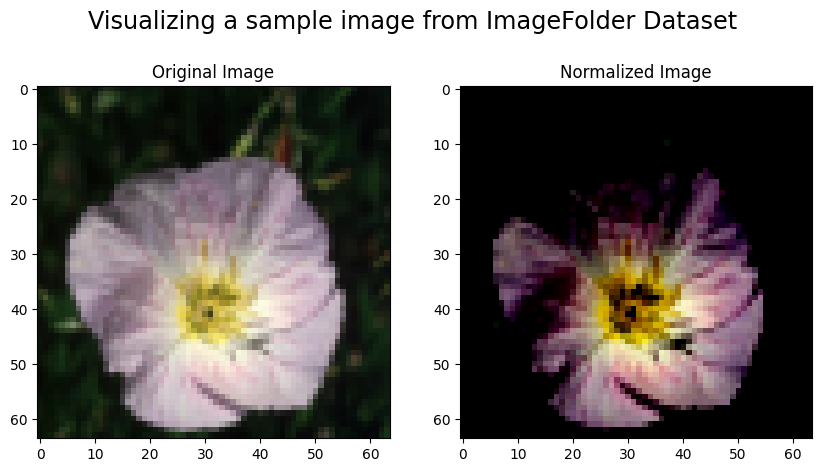

In [36]:
plt.figure(figsize=(10, 5))
image, label = flowers102_train_data[10][0], idx_to_class[flowers102_train_data[10][1]]

plt.subplot(1,2,1)
plt.imshow(denorm(image).permute((1,2,0)))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(image.permute((1,2,0)).clamp(0,1))
plt.title("Normalized Image")

plt.suptitle('Visualizing a sample image from ImageFolder Dataset', fontsize='xx-large', y=1)
plt.show()

In [37]:
train_dataloader = torch.utils.data.DataLoader(flowers102_train_data, batch_size=64, shuffle=True, num_workers=os.cpu_count(), pin_memory=True, drop_last=True, persistent_workers=True)
val_dataloader = torch.utils.data.DataLoader(flowers102_val_data, batch_size=64, shuffle=False, num_workers=os.cpu_count(), pin_memory=True, drop_last=True, persistent_workers=True)
test_dataloader = torch.utils.data.DataLoader(flowers102_test_data, batch_size=64, shuffle=False, num_workers=os.cpu_count(), pin_memory=True, drop_last=True, persistent_workers=True)

print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Val Dataloader:", len(val_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

for data in tqdm(train_dataloader, desc='Sanity checking train_dataloader'):
    pass

for data in tqdm(val_dataloader, desc='Sanity checking val_dataloader'):
    pass

for data in tqdm(test_dataloader, desc='Sanity checking test_dataloader'):
    pass

Number of batches in Train Dataloader: 102
Number of batches in Val Dataloader: 12
Number of batches in Test Dataloader: 12


Sanity checking train_dataloader:   0%|          | 0/102 [00:00<?, ?it/s]

Sanity checking val_dataloader:   0%|          | 0/12 [00:00<?, ?it/s]

Sanity checking test_dataloader:   0%|          | 0/12 [00:00<?, ?it/s]

# <font color='#0baef5 '> [6] </font>  <font color='#f52f0b'> Making PyTorch Custom Dataset Class to load data from local directory </font>

In [38]:
! kaggle datasets download -d trainingdatapro/age-detection-human-faces-18-60-years --unzip -p data/humanAge
!ls data/humanAge

Dataset URL: https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 93% 314M/337M [00:02<00:00, 156MB/s]
100% 337M/337M [00:02<00:00, 137MB/s]
age_detection.csv  test  train


In [39]:
import pandas as pd
from PIL import Image

In [40]:
df = pd.read_csv('data/humanAge/age_detection.csv')
df

,file,age,split
0,train/18-20/0.jpg,18-20,train
1,train/18-20/1.jpg,18-20,train
2,train/18-20/2.jpg,18-20,train
3,train/18-20/3.jpg,18-20,train
4,train/18-20/4.jpg,18-20,train
...,...,...,...
145,test/51-60/25.jpg,51-60,test
146,test/51-60/26.jpg,51-60,test
147,test/51-60/27.jpg,51-60,test
148,test/51-60/28.jpg,51-60,test


In [41]:
from torchvision.transforms import v2 as transforms

image_size = 170, 128
STATS = {
    'mean': (0.5, 0.5, 0.5),
    'std': (0.5, 0.5, 0.5)
}

custom_transform=transforms.Compose([
                                transforms.ToImage(),
                                transforms.Resize(size=image_size),
                                # transforms.RandAugment(num_ops=10),
                                transforms.ToDtype(torch.float32, scale=True),
                                transforms.Normalize(mean=STATS['mean'], std=STATS['std'])
                            ])

For Custom Dataset class can check https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

`__init__`, `__len__` and `__getitem__` should be overwriten.

1. `__len__` retun number of samples in the dataset.
2. `__getitem__` return a sample from the dataset, takes index as an argument.

In [42]:
class HumanAgeDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, transform=None): # Necessary

        self.paths = csv_file.file.values
        self.age_groups = csv_file.age.values
        self.transform = transform
        self.src_dir = 'data/humanAge'


    def load_image(self, index):
        image_path = self.paths[index]
        return Image.open(os.path.join(self.src_dir, image_path))

    def __len__(self): # Necessary
        return len(self.paths)

    def __getitem__(self, index: int): # Necessary
        img = self.load_image(index)
        age_group = self.age_groups[index]
        if self.transform:
            return self.transform(img), age_group
        else:
            return img, age_group

        # return self.transform(img), age_group, self.paths[index]

In [43]:
train_dataset = HumanAgeDataset(csv_file=df[df.split == 'train'], transform=custom_transform)
test_dataset = HumanAgeDataset(csv_file=df[df.split == 'test'], transform=custom_transform)

print('Train data length:', train_dataset.__len__())
print('Test data length:', test_dataset.__len__())

Train data length: 125
Test data length: 25


In [44]:
image, label = train_dataset.__getitem__(1)
image.shape, label

(torch.Size([3, 170, 128]), '18-20')

In [45]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([3, 170, 128]), '18-20')

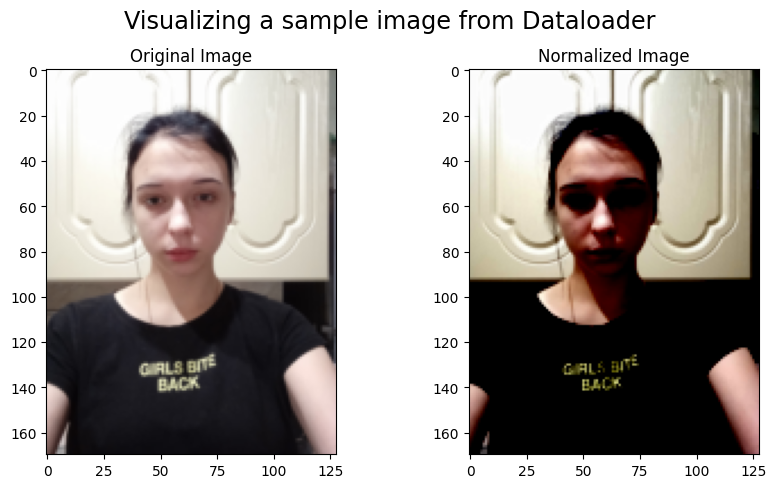

In [49]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(denorm(image).permute((1,2,0)))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(image.permute((1,2,0)).clamp(0,1))
plt.title("Normalized Image")

plt.suptitle('Visualizing a sample image from Dataloader', fontsize='xx-large', y=1)
plt.show()

In [47]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

for data in tqdm(train_dataloader, desc='Sanity checking train_dataloader'):
    pass

for data in tqdm(test_dataloader, desc='Sanity checking test_dataloader'):
    pass

Number of batches in Train Dataloader: 4
Number of batches in Test Dataloader: 1


Sanity checking train_dataloader:   0%|          | 0/4 [00:00<?, ?it/s]

Sanity checking test_dataloader:   0%|          | 0/1 [00:00<?, ?it/s]

 # Exercises:

 1. Take any Scikit-Learn's toy dataset from here [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets) and try to make a dataloader from it.

 Hint: https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset

 2. Take any image dataset from Kaggle and try to make a dataloader from it.

 3. Try to make a custom dataset class for any of the exercise dataset and make dataloader from it.

 3. Try to use cpu as well as gpu for above tasks.

 4. Try to look https://pytorch.org/tutorials/beginner/basics/intro.html#learn-the-basics



# Where you can get help:

1. Pytorch Tutorial: https://pytorch.org/tutorials/beginner/basics/intro.html#learn-the-basics
2. PyTorch: https://pytorch.org/docs/stable/nn.html
3. Torchvision: https://pytorch.org/vision/stable/index.html
4. Pytorch Youtube: https://pytorch.org/tutorials/beginner/introyt.html#introduction-to-pytorch-youtube-series
5. Pytorch Forum: https://discuss.pytorch.org/
6. Other Domains: https://pytorch.org/pytorch-domains
7. For more Advanced Pytorch: https://pytorch.org/tutorials/recipes/recipes_index.html#pytorch-recipes
8. For More Pytorch Projects: https://pytorch.org/ecosystem/,
Can check: [Skorch](https://pytorch.org/ecosystem/skorch/), [Ignite](https://github.com/pytorch/ignite), [PyTorch Lightning](https://github.com/williamFalcon/pytorch-lightning)